# Week 1

In [2]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('steps.csv', delimiter= ';') #importeren van steps
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = pd.read_csv('survey.csv') #importeren van survey
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
df = pd.merge(df1, df2, on = 'id') #samenvoegen van "survey.csv" en "steps.csv" met de kolom van "id"
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [5]:
df['weight'].value_counts() #Tellen hoeveel er is van elke unieke value

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
116.0     1
128.0     1
115.0     1
101.0     1
20.0      1
Name: weight, Length: 72, dtype: int64

In [6]:
#De Pandas functie zet met to_numeric non-numeric data om naar NaN.converts non-numeric data to NaN. 
#"coerce" zorgt ervoor dat de code zonder errors werkt.

df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

#de code hieronder haalt de outliners weg
def abnormalweight(x):
    if(x < 50.0) or (x > 150.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(abnormalweight)

C:\Users\twanp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


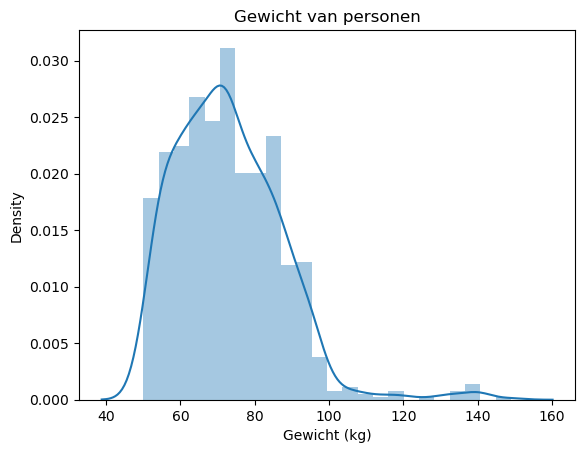

In [7]:
sns.distplot(df['weight']) #selecteren van de "weight" kolom om die in een distplot te tonen.
plt.title('Gewicht van personen') #titel toevoegen
plt.xlabel('Gewicht (kg)') #x-label toevoegen
plt.show()

In [8]:
df['mean_steps'] = df.iloc[:,1:329].mean(axis=1) #gemiddelde stappen subset aanmaken
df['median_steps'] = df.iloc[:,1:329].median(axis=1) #mediaan stappen subset aanmaken
df['mean_steps'] = df['mean_steps'].apply(pd.to_numeric, errors='coerce') #errors weglaten
mean_stepsline = df['mean_steps'].mean() #lijn van gemiddelde van id's in de gemiddeldesubset
median_stepsline = df['median_steps'].median() #lijn van mediaan van id's in de mediaansubset
def above_5(x): #outliners weghalen
    if(x > 18000) or (x < 1000): 
        return float('NaN')
    else: 
        return x
df['mean_steps'] = df['mean_steps'].apply(above_5)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,median_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,9860.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,5374.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,8220.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,3000.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,4986.5


C:\Users\twanp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


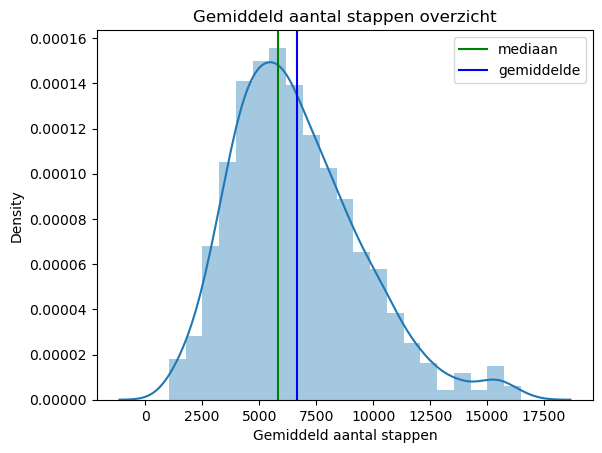

In [30]:
sns.distplot(df['mean_steps']) #distplot plotten met gemiddelde stappen subset
plt.title('Gemiddeld aantal stappen overzicht') #titel toevoegen
plt.xlabel('Gemiddeld aantal stappen') #x-label toevoegen
plt.axvline(median_stepsline, color='green', label='mediaan') #voegt een verticale lijn met de mediaan van het aantal stappen toe in de kleur groen
plt.axvline(mean_stepsline, color='blue', label='gemiddelde') #voegt een verticale lijn met het gemiddelde van het aantal stappen toe in de kleur blauw
plt.legend() #voegt legenda toe
plt.show() #laat de distplot zien

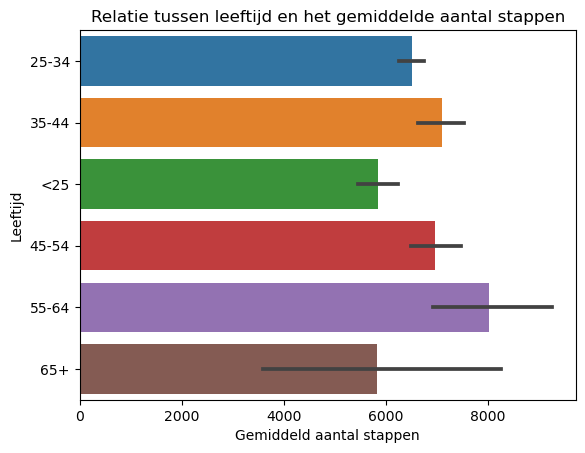

In [9]:
sns.barplot(data=df, y='age' ,x='mean_steps') #barplot maken die de relatie laat zien tussen leeftijd en het gemiddelde aantal stappen
plt.title('Relatie tussen leeftijd en het gemiddelde aantal stappen') #titel toevoegen
plt.ylabel('Leeftijd') #y-label toevoegen
plt.xlabel('Gemiddeld aantal stappen') #x-label toevoegen
plt.show() #barplot laten zien

In [ ]:
#wat in de bovenstaande barplot opvalt is dat de leeftijdsgroep van 55-64 de meeste aantal gemiddelde stappen loopt.
#ook valt op dat de leeftijdsgroepen van 65+ en <25 allebei het minste aantal gemiddelde stappen loopt.
#een verklaring hiervan is dat de 65+ groep met pensioen is en dus meer tijd heeft om te lopen, bij de <25 groep is de digitalisatie een mogelijke verklaring

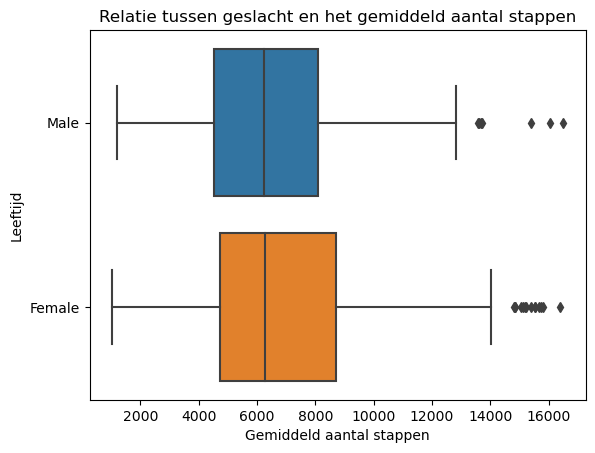

In [10]:
sns.boxplot(data=df, y='gender' ,x='mean_steps') #boxplot plotten die het gemiddelde aantal stappen per geslacht laat zien
plt.title('Relatie tussen geslacht en het gemiddeld aantal stappen') #titel toegevoegd
plt.ylabel('Leeftijd') #y-label toegevoegd
plt.xlabel('Gemiddeld aantal stappen') #x-label toegevoegd
plt.show() #boxplot laten zien

In [ ]:
#wat in de bovenstaande boxplotten opvalt is dat ze elk outliners hebben (de zwarte puntjes)
#ook is te zien dat de mediaan bij mannen en vrouwen gelijk is
#daarnaast is te zien dat de spreiding bij vrouwen groter is.

# Week 2

In [37]:
df["gender_1"]= df["gender"]
df["gender_1"].replace(["Male", "Female"],
                        [1, 0], inplace=True)

df["city_1"]= df["city"]
df["city_1"].replace(["Lille", "Montpellier", "Lyon", "Bordeaux"],
                        [0, 1, 2, 3], inplace=True)
df["age_1"]= df["age"]
df["age_1"].replace(["25-34", "35-44", "45-54", "<25", "55-64", "65+"],
                        [1, 2, 3, 0,4,5], inplace=True)

C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\3152523219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender_1"]= df["gender"]
C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\3152523219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender_1"].replace(["Male", "Female"],
C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\3152523219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [12]:
Hierboven zet ik de kolommen van gender, city en age om naar numerieke waarden. Met numerieke waarden kan worden bekeken of er een verband is tussen de verschillende kolommen en het gemiddeld aantal stappen.

SyntaxError: invalid syntax (386752116.py, line 1)

In [13]:
df.head() # De kolommen met de numerieke waarden bekijken

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,hh_size,education,education_1,height,weight,mean_steps,median_steps,gender_1,city_1,age_1
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,4,4,Master or doctorate,178.0,98.0,10205.521212,9860.0,1,3,1
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,1,3,Bachelor,180.0,77.0,5687.423313,5374.0,1,0,2
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,2,2,Master or doctorate,180.0,83.0,8301.729730,8220.0,1,1,1
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,Bachelor,178.0,80.0,3633.200000,3000.0,1,2,0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,4,Bachelor,167.0,61.0,5312.129630,4986.5,0,1,1


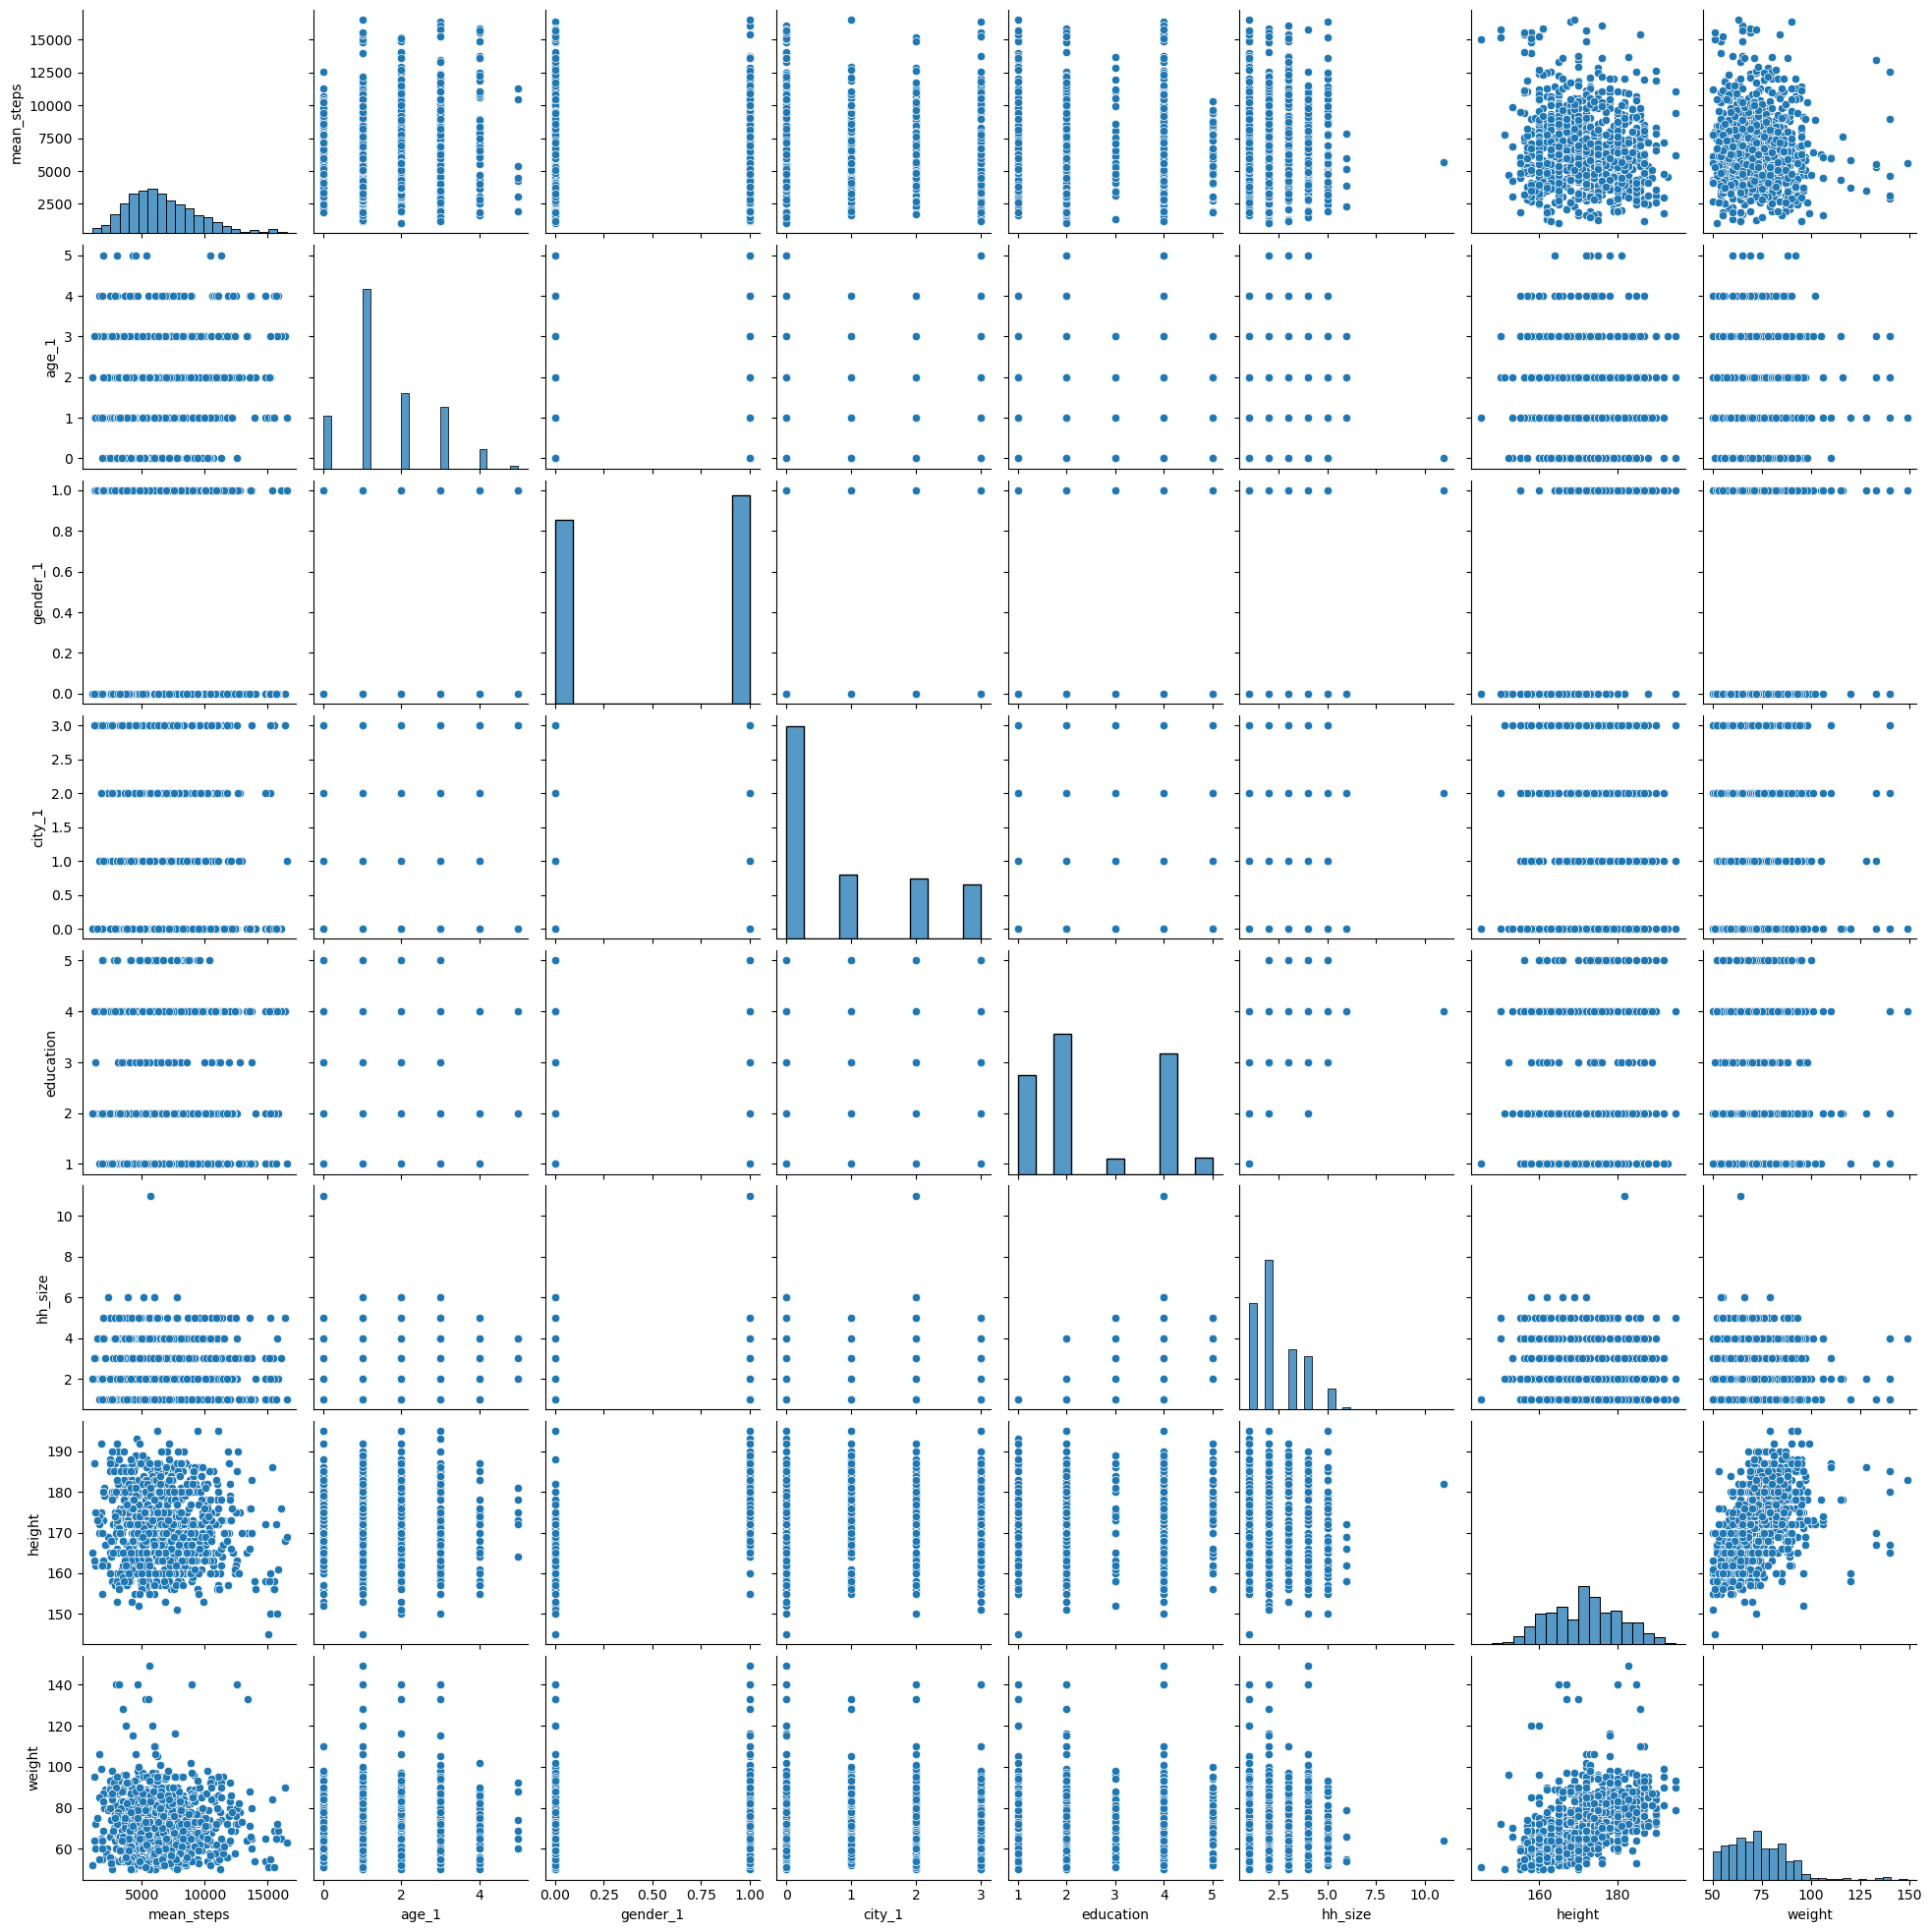

In [16]:
df_subset = df[["mean_steps","age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight"]] #subset met de gewenste kolommen aangemaakt.
sns.pairplot(df_subset) #pairplot plotten om te kijken of er een verband is tussen de variabelen en het gemiddeld aantal stappen

In [18]:
df_subset.corr() #de correlatie tussen de variabelen en het gemiddeld aantal stappen bekijken

,mean_steps,age_1,gender_1,city_1,education,hh_size,height,weight
mean_steps,1.000000,0.146416,-0.062708,-0.123791,0.013688,0.031177,-0.085901,-0.068627
age_1,0.146416,1.000000,-0.046456,0.009613,0.104617,0.156957,-0.091941,0.024467
gender_1,-0.062708,-0.046456,1.000000,0.050065,-0.012117,-0.026577,0.713257,0.405711
city_1,-0.123791,0.009613,0.050065,1.000000,-0.001730,0.046511,0.052628,0.067700
education,0.013688,0.104617,-0.012117,-0.001730,1.000000,0.825585,-0.046343,0.009152
hh_size,0.031177,0.156957,-0.026577,0.046511,0.825585,1.000000,-0.059704,0.012782
height,-0.085901,-0.091941,0.713257,0.052628,-0.046343,-0.059704,1.000000,0.489445
weight,-0.068627,0.024467,0.405711,0.067700,0.009152,0.012782,0.489445,1.000000


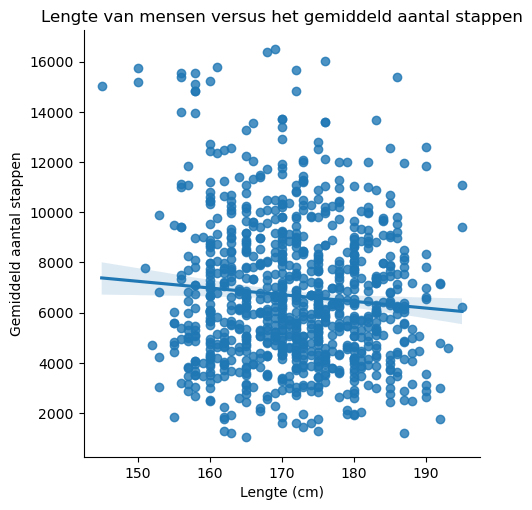

In [23]:
sns.lmplot(x="height", y="mean_steps", data=df) #dit is de plot die de correlatie tussen lengte en het gemiddeld aantal stappen
plt.xlabel('Lengte (cm)') #x-label toegevoegd
plt.ylabel('Gemiddeld aantal stappen') #y-label toegevoegd
plt.title('Lengte van mensen versus het gemiddeld aantal stappen') #titel toegevoegd
plt.show() #plot laten zien

In [ ]:
#Lineaire regressie is een proces waarmee je een (meestal) lineair verband tussen twee variabelen (kolommen) kan aantonen.
#hierboven laat ik het lineaire verband tussen lengte en het gemiddeld aantal stappen.

In [27]:
df=df.dropna(subset=["age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight", "mean_steps"]) #lege waarden weglaten

In [30]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[["age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight"]] 
y = df["mean_steps"]
lm = LinearRegression() #this creates a new LR model
lm = lm.fit(x, y) #this "fits" the model

In [33]:
df["mean_steps_predict"] = lm.predict(x) #aantal gemiddelde stappen voorspellen op basis van de lineaire regressie.
df.head(10)

C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\697282826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mean_steps_predict"] = lm.predict(x) #aantal gemiddelde stappen voorspellen op basis van de lineaire regressie.


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,education_1,height,weight,mean_steps,median_steps,gender_1,city_1,age_1,gem_stappen_predict,mean_steps_predict
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Master or doctorate,178.0,98.0,10205.521212,9860.0,1,3,1,5449.936640,5449.936640
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Bachelor,180.0,77.0,5687.423313,5374.0,1,0,2,6749.058284,6749.058284
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Master or doctorate,180.0,83.0,8301.729730,8220.0,1,1,1,6281.730515,6281.730515
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bachelor,178.0,80.0,3633.200000,3000.0,1,2,0,5626.177359,5626.177359
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bachelor,167.0,61.0,5312.129630,4986.5,0,1,1,6399.731826,6399.731826
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,Vocational,170.0,63.0,11908.509804,11661.0,1,0,2,7229.728523,7229.728523
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Master or doctorate,175.0,75.0,4715.400000,3961.0,1,1,1,6370.639496,6370.639496
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Master or doctorate,165.0,88.0,3594.051724,3032.5,0,3,1,5464.351469,5464.351469
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Vocational,172.0,69.0,8626.707965,8265.0,0,0,2,7162.613822,7162.613822
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,Master or doctorate,165.0,93.0,3787.043478,3463.0,0,0,1,6519.847415,6519.847415


In [34]:
from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df["mean_steps"], df['mean_steps_predict']) #r2 score laten zien

0.045965897351358254

In [36]:
from sklearn.metrics import mean_squared_error #we need this function from sklearn
from math import sqrt #we need the square root from the math library

sqrt(mean_squared_error(df["mean_steps"], df["mean_steps_predict"])) #root mean squared error score laten zien

2706.374878056236

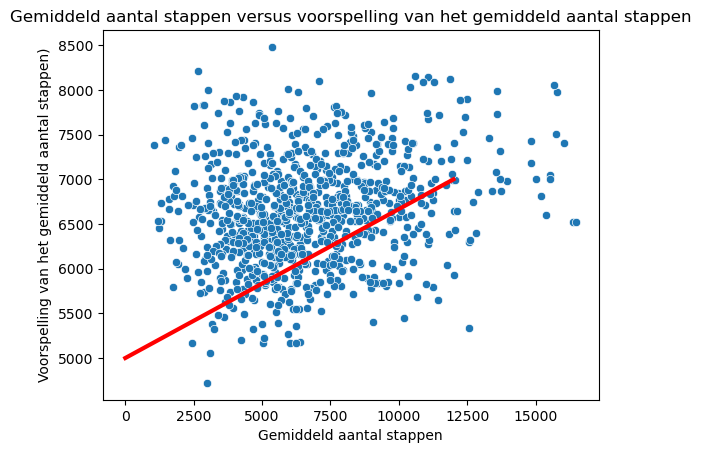

In [39]:
sns.scatterplot(x="mean_steps",y="mean_steps_predict",data=df) #scatterplot met het gemiddeld aantal stappen en de voorspelling daarvan plotten
plt.plot([0, 12000], [5000, 7000], color='red', lw=3) #Rode lijn plotten
plt.xlabel('Gemiddeld aantal stappen')
plt.ylabel('Voorspelling van het gemiddeld aantal stappen)')
plt.title("Gemiddeld aantal stappen versus voorspelling van het gemiddeld aantal stappen")
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.metrics import r2_score #we need this function from sklearn
import itertools
#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
stuff = ["age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight"]
for L in range(len(stuff) + 1):
  for subset in itertools.combinations(stuff, L):
    combi = list(subset)
    
    if len(combi) != 0:
      x = df[combi] 
      y = df["mean_steps"]
      lm = LinearRegression() #this creates a new LR model
      lm = lm.fit(x, y) #this "fits" the model
      df["gem_stappen_1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
      r2 = r2_score(df['mean_steps'], df['gem_stappen_1'])
      print(combi, r2)

C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\2043460170.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gem_stappen_1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\2043460170.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gem_stappen_1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
C:\Users\twanp\AppData\Local\Temp\ipykernel_

['age_1'] 0.02450872659650627
['gender_1'] 0.002353738144105777
['city_1'] 0.0149303435967999
['education'] 2.658750944017907e-05
['hh_size'] 0.00038035530236135706
['height'] 0.003420835010872758
['weight'] 0.004647523457239289
['age_1', 'gender_1'] 0.02612015146697344
['age_1', 'city_1'] 0.040084379313048424
['age_1', 'education'] 0.02494175439164137
['age_1', 'hh_size'] 0.0245180512723584
['age_1', 'height'] 0.026264470712693888
['age_1', 'weight'] 0.0296363864060033
['gender_1', 'city_1'] 0.016740610441114634
['gender_1', 'education'] 0.002377870317472275
['gender_1', 'hh_size'] 0.002712901631732545
['gender_1', 'height'] 0.0035331743312831954
['gender_1', 'weight'] 0.005158964823874346
['city_1', 'education'] 0.01497714713224041
['city_1', 'hh_size'] 0.015529638103940147
['city_1', 'height'] 0.017644046201015562
['city_1', 'weight'] 0.01854269806077935
['education', 'hh_size'] 0.0017781778710275198
['education', 'height'] 0.0034633074766421412
['education', 'weight'] 0.00466860591

C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\2043460170.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gem_stappen_1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\2043460170.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gem_stappen_1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
C:\Users\twanp\AppData\Local\Temp\ipykernel_

['height', 'weight'] 0.00547266202616814
['age_1', 'gender_1', 'city_1'] 0.04123464074812766
['age_1', 'gender_1', 'education'] 0.02653595238390072
['age_1', 'gender_1', 'hh_size'] 0.026130400170476076
['age_1', 'gender_1', 'height'] 0.026494386858772923
['age_1', 'gender_1', 'weight'] 0.029774801990392397
['age_1', 'city_1', 'education'] 0.04060184100923803
['age_1', 'city_1', 'hh_size'] 0.04008749238170317
['age_1', 'city_1', 'height'] 0.04131537864780788
['age_1', 'city_1', 'weight'] 0.044105260524518575
['age_1', 'education', 'hh_size'] 0.025549077910284934
['age_1', 'education', 'height'] 0.02671999234185929
['age_1', 'education', 'weight'] 0.0300512965235884
['age_1', 'hh_size', 'height'] 0.02628089249315857
['age_1', 'hh_size', 'weight'] 0.029642179052206563
['age_1', 'height', 'weight'] 0.02969025693453975
['gender_1', 'city_1', 'education'] 0.01678414790622651
['gender_1', 'city_1', 'hh_size'] 0.017312396990369128
['gender_1', 'city_1', 'height'] 0.0177172915012741
['gender_1'

C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\2043460170.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gem_stappen_1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\2043460170.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gem_stappen_1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
C:\Users\twanp\AppData\Local\Temp\ipykernel_

['education', 'height', 'weight'] 0.005502851234308825
['hh_size', 'height', 'weight'] 0.005828922993169838
['age_1', 'gender_1', 'city_1', 'education'] 0.0417349699934344
['age_1', 'gender_1', 'city_1', 'hh_size'] 0.04123711658292151
['age_1', 'gender_1', 'city_1', 'height'] 0.041488190849346074
['age_1', 'gender_1', 'city_1', 'weight'] 0.0441818975385333
['age_1', 'gender_1', 'education', 'hh_size'] 0.02710193678720929
['age_1', 'gender_1', 'education', 'height'] 0.026932899061382742
['age_1', 'gender_1', 'education', 'weight'] 0.030185591301616133
['age_1', 'gender_1', 'hh_size', 'height'] 0.026508658286160558
['age_1', 'gender_1', 'hh_size', 'weight'] 0.02978106324416019
['age_1', 'gender_1', 'height', 'weight'] 0.02977480305325031
['age_1', 'city_1', 'education', 'hh_size'] 0.04190249972172033
['age_1', 'city_1', 'education', 'height'] 0.04185202044959935
['age_1', 'city_1', 'education', 'weight'] 0.04460217680240697
['age_1', 'city_1', 'hh_size', 'height'] 0.041316105853381524
['

C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\2043460170.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gem_stappen_1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
C:\Users\twanp\AppData\Local\Temp\ipykernel_22776\2043460170.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gem_stappen_1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
C:\Users\twanp\AppData\Local\Temp\ipykernel_

In [ ]:
#hierboven wordt de r2 score van de combinaties van de verschillende variabelen berekend

In [ ]:
# Conclusie
#mijn conclusie is dat er geen verband in de gebruikte dataset te vinden is. Zo is de correlatie onder de 0.6 tussen verschillende variabelen.
#Ook is de r2 score laag en de mean squared error score juist erg hoog. Door de aparte scores is de voorspelling niet optimaal. 